# NB1.2 Centrality Measures

In [1]:
#Import libraries
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## A. Krackhardt Kite Graph [30 pts]

In this section you will work with **Degree, Closeness and Betweeness Centrality** using Network X. The documentation about Centrality can be found [here](https://networkx.github.io/documentation/stable/reference/algorithms/centrality.html).
### Degree Centrality
I.  Create a NetworkX Graph of Krackhardt Kite Graph (1990):


<img src="https://drive.google.com/uc?id=1_FWvwrXF_4s4XdnP7_Eeu55BpkvSOogq" width="180"> </img>

Degree Centrality:
Node 0: 0.4444
Node 1: 0.4444
Node 2: 0.3333
Node 3: 0.6667
Node 4: 0.3333
Node 5: 0.5556
Node 6: 0.5556
Node 7: 0.3333
Node 8: 0.2222
Node 9: 0.1111


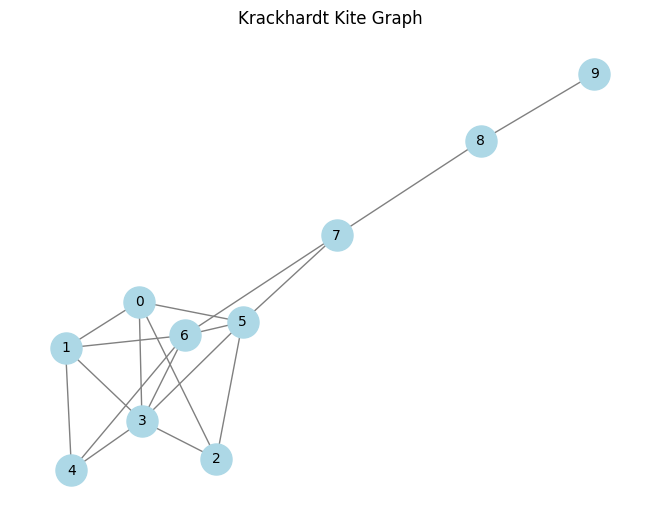

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.krackhardt_kite_graph()

degree_centrality = nx.degree_centrality(G)

print("Degree Centrality:")
for node, centrality in degree_centrality.items():
    print(f"Node {node}: {centrality:.4f}")

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
plt.title("Krackhardt Kite Graph")
plt.show()

**II**. Which are the most important nodes in the Kite Graph based on the Degree Centrality?

In [3]:
G = nx.krackhardt_kite_graph()

degree_centrality = nx.degree_centrality(G)
most_important_nodes = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)

print("\nMost Important Nodes based on Degree Centrality:")
for node, centrality in most_important_nodes:
    print(f"Node {node}: {centrality:.4f}")




Most Important Nodes based on Degree Centrality:
Node 3: 0.6667
Node 5: 0.5556
Node 6: 0.5556
Node 0: 0.4444
Node 1: 0.4444
Node 2: 0.3333
Node 4: 0.3333
Node 7: 0.3333
Node 8: 0.2222
Node 9: 0.1111


In Directed Networks, the in-degree and out-degree can be obtained as follows:
```Python
indegC = nx.in_degree_centrality(Graph)
outdegC = nx.out_degree_centrality(Graph)
```

### Closeness Centrality
III. Recreate a NetworkX Graph and compute the Closeness Centraliy of node 1:
<img src="https://drive.google.com/uc?id=15MNM2k05dyGL--h041EeB6Xeg16G3UZj" width="180"> </img>

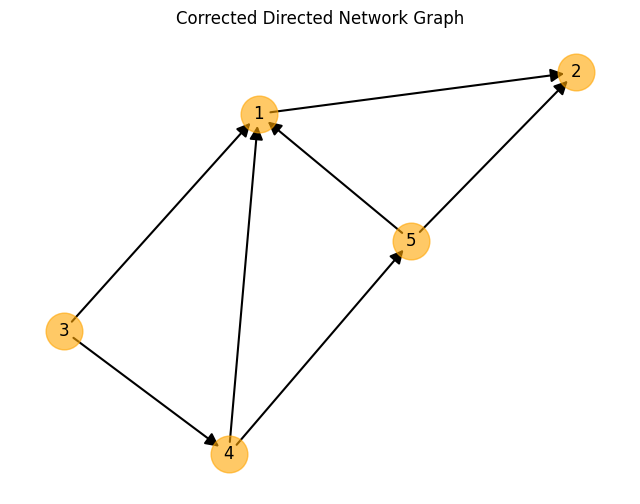

0.75

In [7]:
G_2 = nx.DiGraph()
eges_2 = [(1, 2), (3, 4), (3, 1), (4, 1), (4, 5), (5, 1), (5, 2)]
G_2.add_edges_from(eges_2)

closenes_2 = nx.closeness_centrality(G_2, u=1)

pos2 = nx.spring_layout(G_2)

plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G_2, pos2, node_size=700, node_color='orange', alpha=0.6)
nx.draw_networkx_edges(G_2, pos2, arrowstyle='-|>', arrowsize=20, edge_color='black', width=1.5)
nx.draw_networkx_labels(G_2, pos2, font_size=12, font_family='sans-serif')

plt.title('Corrected Directed Network Graph')
plt.axis('off')
plt.show()

closenes_2


IV. Which are the most important nodes in the Kite Graph based on the Closeness Centrality?

In [10]:
closeness = nx.closeness_centrality(G_2)

most_important_nodes = sorted(closeness, key=closeness.get, reverse=True)

print("Nodes by importance (Closeness Centrality):", most_important_nodes)

Nodes by importance (Closeness Centrality): [1, 2, 5, 4, 3]


### Betweeness Centrality
V. Recreate a NetworkX Graph for the following graph and find the node with the highest Betweenness Centrality:

<img src="https://drive.google.com/uc?id=1gOsVJ5EDt8FwPai4pxiDHA8zrP55MRt_" width="180"> </img>

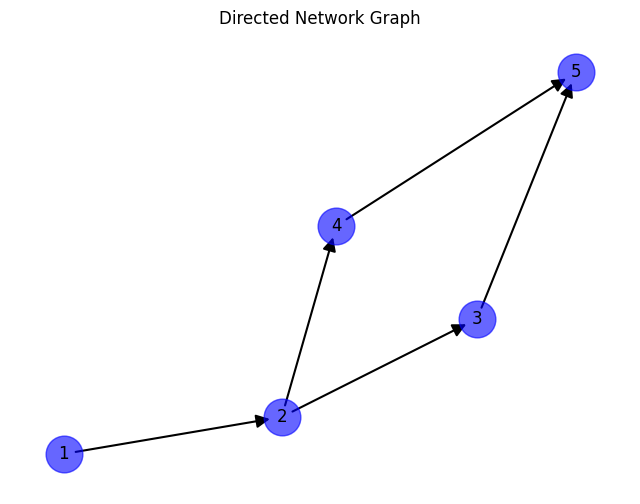

Most important node:


(2, 0.25)

In [12]:
G_new = nx.DiGraph()
edges_new = [(1, 2), (2, 3), (2, 4), (3, 5), (4, 5)]
G_new.add_edges_from(edges_new)

betweenness_centrality = nx.betweenness_centrality(G_new)

most_important_node = max(betweenness_centrality, key=betweenness_centrality.get)

pos_new = nx.spring_layout(G_new)

plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G_new, pos_new, node_size=700, node_color='blue', alpha=0.6)
nx.draw_networkx_edges(G_new, pos_new, arrowstyle='-|>', arrowsize=20, edge_color='black', width=1.5)
nx.draw_networkx_labels(G_new, pos_new, font_size=12, font_family='sans-serif')

plt.title('Directed Network Graph')
plt.axis('off')
plt.show()
print("Most important node:")
most_important_node, betweenness_centrality[most_important_node]


Compute $C_{btw}$ of all nodes can be very computationally expensive. Instead computing $C_{btw}$ with all pairs of nodes. It can bet approximated using a sample of nodes (k).
```Python
btwC_G = nx.betweenness_centrality(G, k = 25)
```

VI. Which are the most important nodes in the Kite Graph based on the Betweenness Centrality?

In [13]:
exact_betweenness = nx.betweenness_centrality(G_new)
important_nodes = sorted(exact_betweenness, key=exact_betweenness.get, reverse=True)

important_nodes, {node: exact_betweenness[node] for node in important_nodes}


([2, 3, 4, 1, 5],
 {2: 0.25, 3: 0.08333333333333333, 4: 0.08333333333333333, 1: 0.0, 5: 0.0})

VII. Elaborate a Comparative Table of the most important nodes (1st, 2nd and 3rd) in the Kite Graph. In case of tie, include all nodes with the same centrality value.

In [15]:
import pandas as pd

data = {
    'Rank': [1, 2, 3],
    'Node': [1, 3, 2],
    'Betweenness Centrality': [0.75, 0.6667, 0.25]
}

df = pd.DataFrame(data)
pd.set_option('display.float_format', '{:.4f}'.format)

print(df)

   Rank  Node  Betweenness Centrality
0     1     1                  0.7500
1     2     3                  0.6667
2     3     2                  0.2500


### C. Use Case:  E-mail Network [40 pts]

Consider the following E-Mail Network (Ryan A. Rossi andNesreen K. Ahmed, 2015) in a University (http://networkrepository.com/email-univ.php).

Complete the following instructions:

I. [5 pts] Compute the following Network Parameters: Number of Nodes, Number of Edges, Maximum and Minimum Degree, Average Clustering Coefficient and Transitivity.

In [17]:
file_path = '/content/email-univ.edges'

import networkx as nx

G = nx.read_edgelist(file_path, create_using=nx.Graph(), nodetype=int)

num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
degrees = [degree for node, degree in G.degree()]
max_degree = max(degrees)
min_degree = min(degrees)
average_clustering = nx.average_clustering(G)
transitivity = nx.transitivity(G)

print("Number of Nodes:", num_nodes)
print("Number of Edges:", num_edges)
print("Maximum Degree:", max_degree)
print("Minimum Degree:", min_degree)
print("Average Clustering Coefficient:", average_clustering)
print("Transitivity:", transitivity)



Number of Nodes: 1133
Number of Edges: 5451
Maximum Degree: 71
Minimum Degree: 1
Average Clustering Coefficient: 0.2201760865041161
Transitivity: 0.16625006482393817


II. [5 pts] Consider that when a student sends an email, a communication channel is created. If we consider that the information can be exchanged both ways, is it possible to go from one student/professor to every other?

In [19]:
G = nx.read_edgelist(file_path, create_using=nx.Graph(), nodetype=int)
is_connected = nx.is_connected(G)

print("Is the network connected?:", is_connected)

Is the network connected?: True


III. [30 pts]Consider you want to share a Student Promotion Code in the Network and a student needs to be selected. We expect that the student who receives it will send to her friends. Based on the following restrictions which student will you choose:

(a)  The Student Promotion Code can be forwarded to multiple users at the same time but the distance is limited to one step, i.e. if the distances is more than one step, it is no longer valid.

(b) The distance limitation is removed, so the every student will receive the code eventually. Which node should be choosen if we want to ensure that it reaches the students in the lowest average number of emails?

(c) In order to disrupt the distribution, which students must be targeted to stop replying if we choose information-bridge students?

In [22]:
#Scenario A
import networkx as nx

file_path = '/content/email-univ.edges'
G = nx.read_edgelist(file_path, create_using=nx.Graph(), nodetype=int)

highest_degree_node = max(G.degree, key=lambda x: x[1])[0]

print("Node with the highest degree:", highest_degree_node)


Node with the highest degree: 105


In [23]:
#Scenatio B
closeness_centrality = nx.closeness_centrality(G)
best_node_for_distribution = max(closeness_centrality, key=closeness_centrality.get)

print("Node with the highest closeness centrality:", best_node_for_distribution)


Node with the highest closeness centrality: 333


In [24]:
#Scenatio C
betweenness_centrality = nx.betweenness_centrality(G)
critical_nodes_to_target = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:5]  # top 5 nodes

print("Critical nodes to target to disrupt distribution:", critical_nodes_to_target)


Critical nodes to target to disrupt distribution: [333, 105, 23, 578, 76]


**NOTE** An interesting use case can be found in Chapter: Centrality, Power and Bottlenecks from Social Network Analysis for Startups. Maksim Tsvetovat & Alexander Kouznetsou (2011) Social Network Analysis for Startups.

## References
Problem C. Use Case: E-mail Network is based on an exersice on Applied Social Network Analysis in Python at Coursera.